UiBench per-CPU CGroup residency analysis (with eas 1.3 with prefer idle relax)
=======================
This is a run of EAS1.3 stack on TOT Wahoo with prefer idle relax optimization

In [1]:
#!/usr/bin/env python
%pylab inline
import trappy
from trace import Trace
import logging
import pandas as pd
import numpy as np
import os

from conf import LisaLogging
LisaLogging.setup(level=logging.ERROR)
logging.info('#### Setup FTrace')
path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/results/UiBench_eas13_prefidle3_4.4.56-g931b784e1a3f-29956-gf926be200db2/trace.html"

Populating the interactive namespace from numpy and matplotlib


In [2]:
tr = Trace(None, path_to_html,
           cgroup_info = { 
               'cgroups': ['foreground', 'background', 'system-background', 'top-app', 'rt'],
               'controller_ids': { 4: 'cpuset', 2: 'schedtune' }
           },
           events=[ 'sched_switch', 'cgroup_attach_task_devlib', 'cgroup_attach_task', 'sched_process_fork' ],
           normalize_time=False)

/home/joelaf/repo/lisa-aosp/external/lisa/libs/utils/trace.py:258: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  window=window, normalize_time=normalize_time)


Total amount of time spent per Cgroup (schedtune)
===========================
(NaN is the idle task)

In [3]:

HTML output of the residency chart is attached.tr.data_frame.cpu_residencies_cgroup('schedtune')

,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,total
schedtune,,,,,,,,,
background,0.931796,0.983667,0.022814,0.091718,0.000000,0.000000,0.278520,0.539544,2.848059
foreground,3.572210,1.816988,0.743716,0.437553,0.039625,0.059143,0.309066,0.358214,7.336515
root,1.140673,2.043807,2.607697,1.171652,0.141677,0.134447,0.269498,0.224320,7.733771
top-app,2.495690,4.889287,0.318106,0.149424,0.375886,0.319190,0.062527,0.037715,8.647825
NaN,24.148273,22.510600,28.553951,30.498123,31.690791,31.720860,31.323883,31.401546,231.848027


Plot per-CPU breakdown without considering idle time
------------------------------------------------------------

/home/joelaf/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


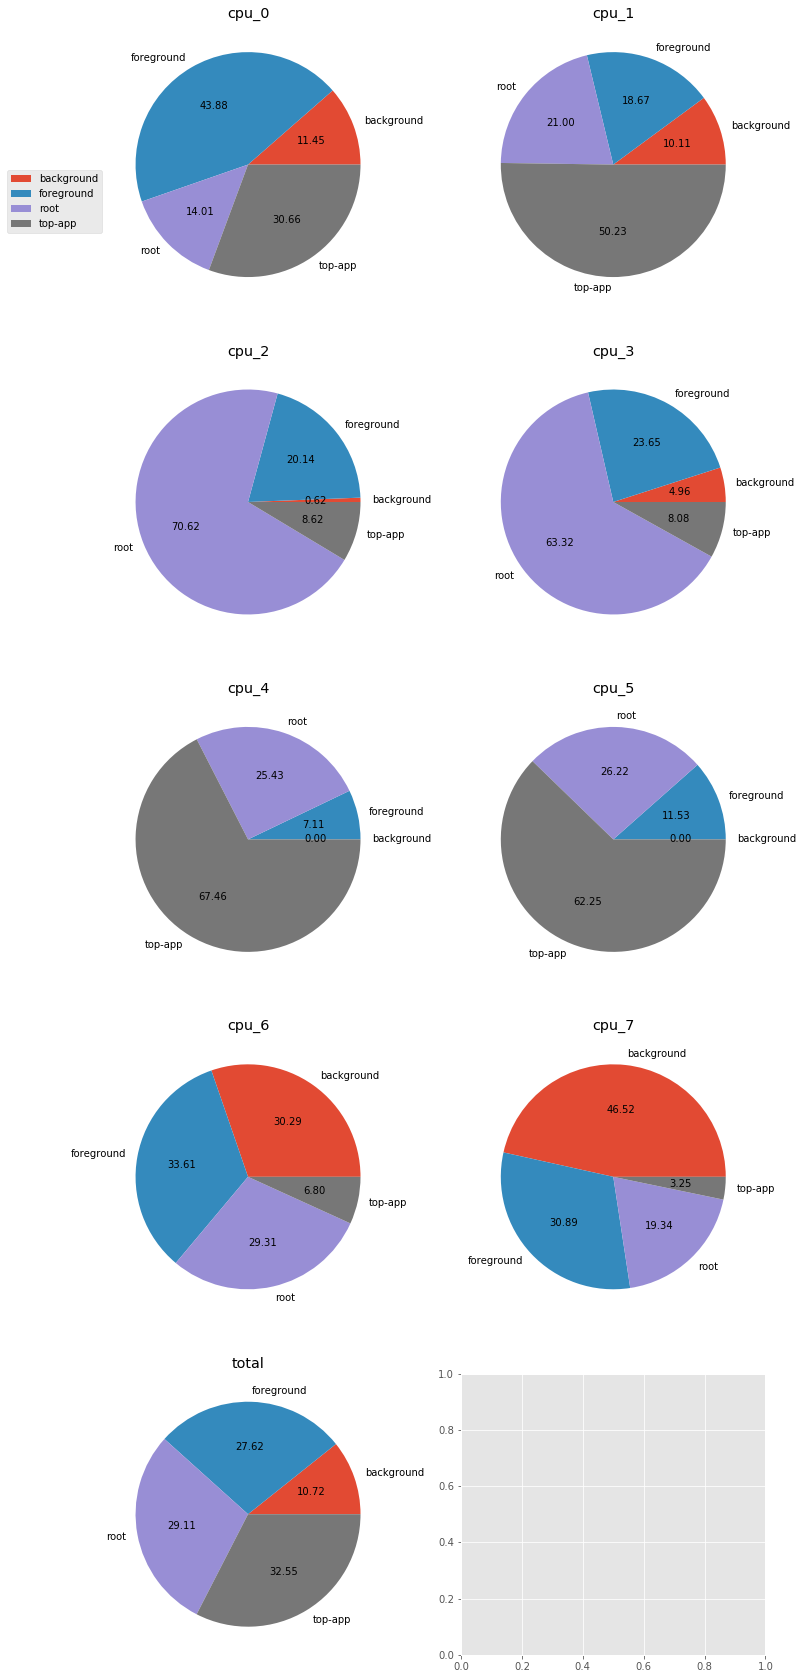

In [4]:
tr.analysis.residency.plot_cgroup('schedtune', idle=False)

Plot per-CPU breakdown WITH considering idle time (yellow slice)
------------------------------------------------------------

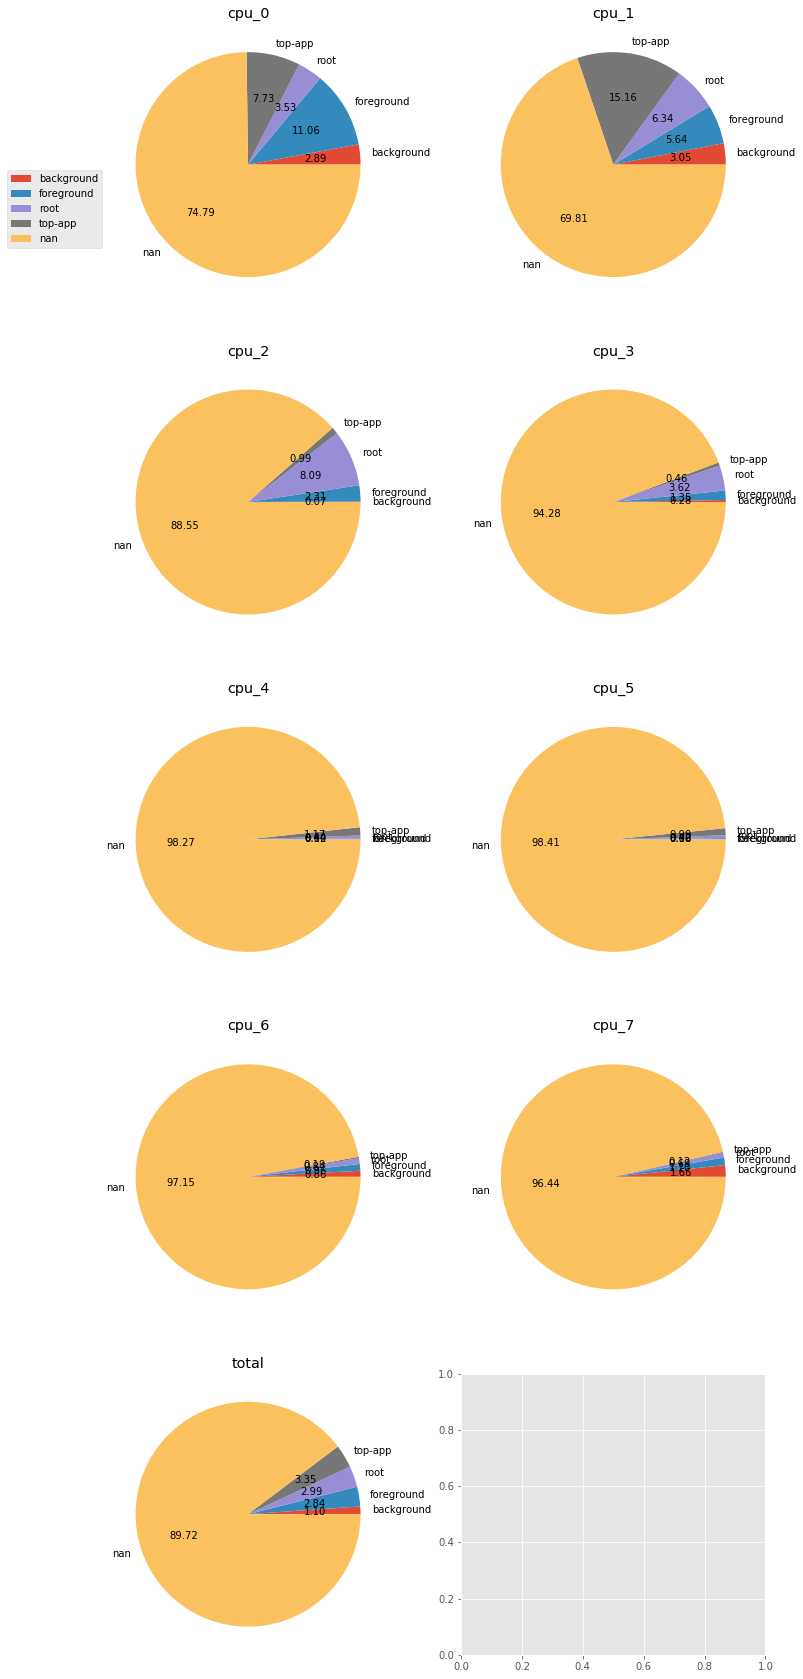

In [5]:
tr.analysis.residency.plot_cgroup('schedtune', idle=True)

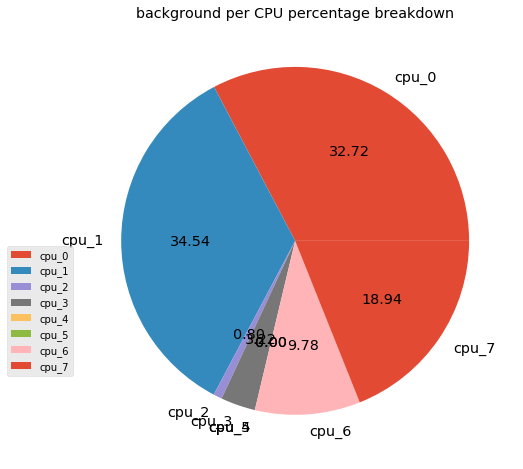

In [6]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='background')

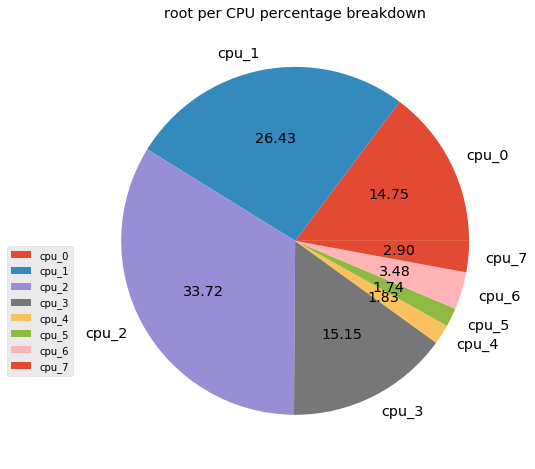

In [7]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='root')

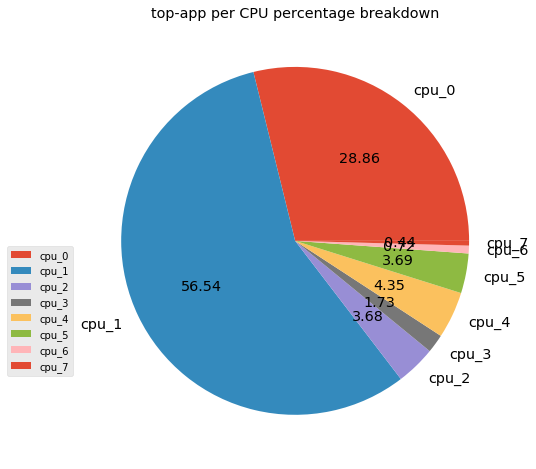

In [8]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='top-app')

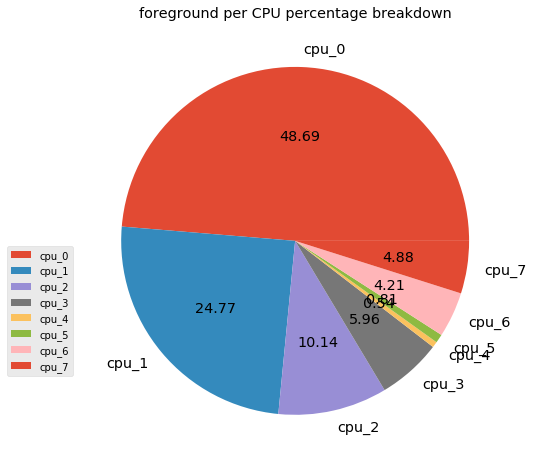

In [9]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='foreground')

Conclusions
-------------
* root CGroup ran considerably less on core 6 (7.5% to 2.6%) and slightly less on core 7 so there's definitely improvement with tasks that are not assigned to any CGroup with this patch stack
* Background group still runs on the big cores